# Part 1 Data Cleaning and EDA
----

### Imports

In [74]:
# Import needed for cleaning and eda
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Load in the data

#### Geo Data

In [2]:
# Load in Geo data
df_geo = pd.read_csv('https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv')
df_geo.head()

,ISO 3166 Country Code,Country,Latitude,Longitude
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17


In [3]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ISO 3166 Country Code  239 non-null    object 
 1   Country                240 non-null    object 
 2   Latitude               240 non-null    float64
 3   Longitude              240 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.6+ KB


*This dataset displays geographical information for 240 countries*

In [4]:
# Drop 'ISO 3166 Country Code'
df_geo = df_geo.drop(columns= 'ISO 3166 Country Code')

- Dropping 'ISO 3166 Country Code' column because it is not necessary for our project since they are just codes that refer to the countries and their subdivisions.

In [5]:
# Sanity Check
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    240 non-null    object 
 1   Latitude   240 non-null    float64
 2   Longitude  240 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


#### Food Loss and Waste Data

In [6]:
# Read in the food loss and waste dataset
df1 = pd.read_csv('data/Data.csv' )
df1.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN


In [7]:
# Check out data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27773 entries, 0 to 27772
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  27773 non-null  int64  
 1   country                   27773 non-null  object 
 2   region                    871 non-null    object 
 3   cpc_code                  27773 non-null  object 
 4   commodity                 27773 non-null  object 
 5   year                      27773 non-null  int64  
 6   loss_percentage           27773 non-null  float64
 7   loss_percentage_original  27773 non-null  object 
 8   loss_quantity             4552 non-null   object 
 9   activity                  20873 non-null  object 
 10  food_supply_stage         27724 non-null  object 
 11  treatment                 881 non-null    object 
 12  cause_of_loss             925 non-null    object 
 13  sample_size               1176 non-null   object 
 14  method

In [8]:
# Remove unnecessary cols for this project
df1 = df1.drop(columns = ['url','loss_percentage_original', 'm49_code','cpc_code','method_data_collection'])

In [9]:
# Check cols with missing values
for col in df1:
    missing_values = df1[col].isna().sum()
    if missing_values > 0:
        print(f'{col}: {missing_values}')

region: 26902
loss_quantity: 23221
activity: 6900
food_supply_stage: 49
treatment: 26892
cause_of_loss: 26848
sample_size: 26597
reference: 19337
notes: 26423


In [10]:
# Remove columns with more than 70% data missing
for col in df1:
    missing_values = df1[col].isna().sum()
    if missing_values > 15_000:
        df1 = df1.drop(col, axis=1)

In [11]:
# Find any patterns for missing data
df1.loc[(df1['food_supply_stage'].isna() == True)]

,country,commodity,year,loss_percentage,activity,food_supply_stage
3065,Benin,Maize (corn),2000,17.80,NaN,NaN
3212,Ecuador,Maize (corn),2013,20.00,NaN,NaN
6234,Germany,Dairy products n.e.c.,2011,2.15,NaN,NaN
10435,Jordan,Eggplants (aubergines),2002,19.40,NaN,NaN
10436,Jordan,Tomatoes,2002,18.00,NaN,NaN
10437,Jordan,"Pumpkins, squash and gourds",2002,21.90,NaN,NaN
10438,Jordan,"Pepper (<i>Piper</i> spp.), raw",2002,23.00,NaN,NaN
10779,Kenya,Maize (corn),2012,15.15,NaN,NaN
11060,Kenya,Maize (corn),2006,5.75,NaN,NaN
11061,Kenya,Maize (corn),2006,24.20,NaN,NaN


In [12]:
# Find any patterns for missing data
df1.loc[(df1['activity'].isna() == True) & (df1['food_supply_stage'] == 'Whole supply chain')]

,country,commodity,year,loss_percentage,activity,food_supply_stage
0,Myanmar,"Groundnuts, excluding shelled",2009,5.22,NaN,Whole supply chain
1,Myanmar,"Groundnuts, excluding shelled",2008,5.43,NaN,Whole supply chain
2,Myanmar,"Groundnuts, excluding shelled",2007,5.61,NaN,Whole supply chain
3,Myanmar,"Groundnuts, excluding shelled",2006,5.40,NaN,Whole supply chain
4,Myanmar,"Groundnuts, excluding shelled",2005,5.00,NaN,Whole supply chain
...,...,...,...,...,...,...
27151,Zambia,Sorghum,2017,12.71,NaN,Whole supply chain
27187,Zambia,Rice,2016,4.78,NaN,Whole supply chain
27188,Zambia,Sorghum,2016,14.21,NaN,Whole supply chain
27224,Zambia,Rice,2015,9.73,NaN,Whole supply chain


- Null values in the 'activity' column have 'Whole supply chain' and 'FAO's annual Agriculture Production Questionna..' in common. Therefore, I will replace these missing values as 'wsc'. 'wsc' is just a fill in value instead of imputing with 'missing'

In [13]:
# Imputing NaNs in 'activity'
df1['activity'].fillna('wsc', inplace=True)

In [14]:
# Check what cols are left with missing values
for col in df1:
    missing_values = df1[col].isna().sum()
    if missing_values > 0:
        print(f'{col}: {missing_values}')

food_supply_stage: 49


In [15]:
# Handle the remaining missing values by rows
df1 = df1.dropna()

In [16]:
# Check out how many countries are in this dataset
df1['country'].nunique()

149

In [17]:
# Check out how many stages they are
df1['food_supply_stage'].nunique()

19

In [18]:
# Check final shape
df1.shape

(27724, 6)

In [19]:
# Sanity check
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27724 entries, 0 to 27772
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27724 non-null  object 
 1   commodity          27724 non-null  object 
 2   year               27724 non-null  int64  
 3   loss_percentage    27724 non-null  float64
 4   activity           27724 non-null  object 
 5   food_supply_stage  27724 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.5+ MB


### Merge two dataframes

In [20]:
# Merge on 'country'
df2 = pd.merge(df_geo, df1, left_on='Country', right_on='country', how='inner')
df2.head()

,Country,Latitude,Longitude,country,commodity,year,loss_percentage,activity,food_supply_stage
0,Afghanistan,33.0,65.0,Afghanistan,Wheat,2017,15.00,wsc,Whole supply chain
1,Afghanistan,33.0,65.0,Afghanistan,Maize (corn),2017,14.95,wsc,Whole supply chain
2,Afghanistan,33.0,65.0,Afghanistan,Rice,2017,7.09,wsc,Whole supply chain
3,Afghanistan,33.0,65.0,Afghanistan,Barley,2017,14.74,wsc,Whole supply chain
4,Afghanistan,33.0,65.0,Afghanistan,Wheat,2016,15.02,wsc,Whole supply chain


In [21]:
# Keep only one country column
df2 = df2.drop(columns = 'Country')

In [22]:
# Check out final df
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23810 entries, 0 to 23809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           23810 non-null  float64
 1   Longitude          23810 non-null  float64
 2   country            23810 non-null  object 
 3   commodity          23810 non-null  object 
 4   year               23810 non-null  int64  
 5   loss_percentage    23810 non-null  float64
 6   activity           23810 non-null  object 
 7   food_supply_stage  23810 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [23]:
# Save clean df
df2.to_csv('clean_data.csv', index=False)

### EDA

In [24]:
# Present summary statistics
df2.describe()

,Latitude,Longitude,year,loss_percentage
count,23810.000000,23810.000000,23810.000000,23810.000000
mean,9.384454,19.235413,2009.838807,3.929215
std,20.296986,39.552353,5.803383,5.285207
min,-41.000000,-102.000000,2000.000000,0.003000
25%,-2.000000,-2.000000,2005.000000,1.320000
50%,9.500000,24.000000,2010.000000,2.500000
75%,17.000000,35.000000,2015.000000,4.000000
max,64.000000,175.000000,2021.000000,65.000000


- Based on the summary statistics above,  the dataset consists of 23,810 rows of information. Also, the dataset ranges from the year 2000 to 2021 and the loss percentage ranges from 0.0% to 65%, with an average of 3.9%. 

#### Distributions of Numeric Features Histograms

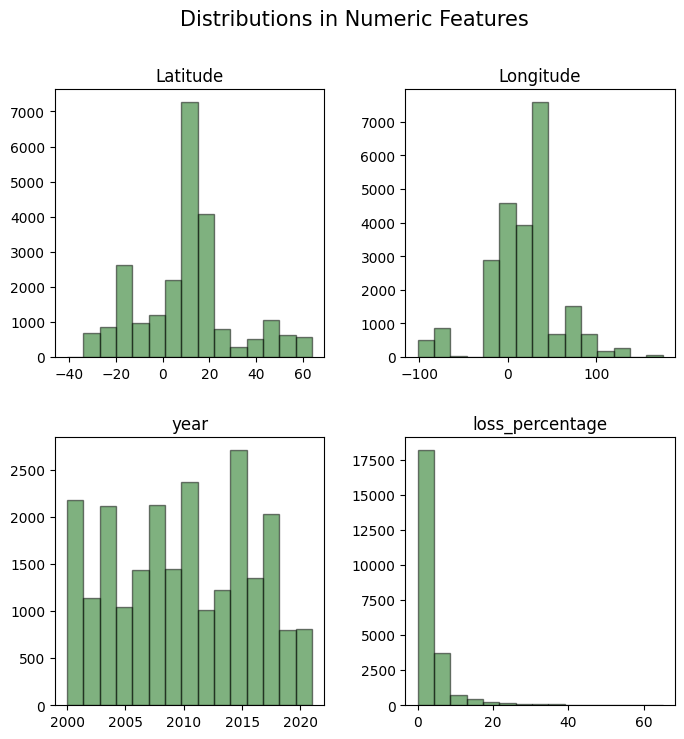

In [25]:
# Check out distribution of values in the numeric columns
df2.hist(figsize = (8, 8), bins= 15, grid=False, color = 'darkgreen', alpha = 0.5, edgecolor='black' )
plt.suptitle('Distributions in Numeric Features', size =15)

# Set font family for the rest of the notebook
plt.rcParams['font.family'] = 'serif';

#### Correlation Heatmap with Loss Percentage

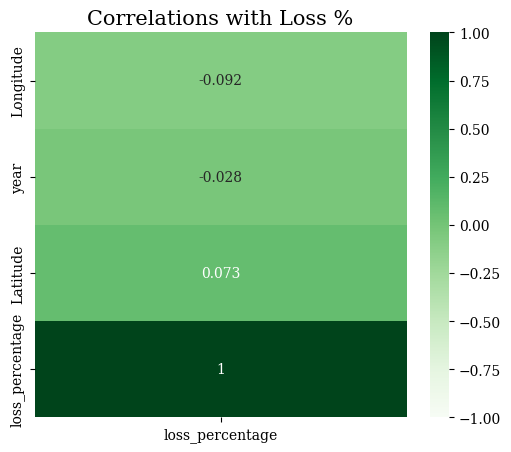

In [26]:
# Creating a heatmap to show the correlations of numeric cols and target
# Code adapted from 3.07 lesson model workflow

plt.figure(figsize= (6,5))
plt.title('Correlations with Loss %', size = 15)
sns.heatmap(df2.corr()[['loss_percentage']].sort_values(by = 'loss_percentage'),
           vmin = -1,
           vmax = 1,
           cmap = 'Greens',
           annot = True);
plt.savefig('Correlations with Loss %')

Heatmap Interpretation :
- 'year' and 'Longitude' have weak and negative correlation with the target, 'loss_percenatage'.
- 'Latitude' shows a weak positive correlation with the target, 'loss_percentage'

#### Countries by Average Loss % Graphs

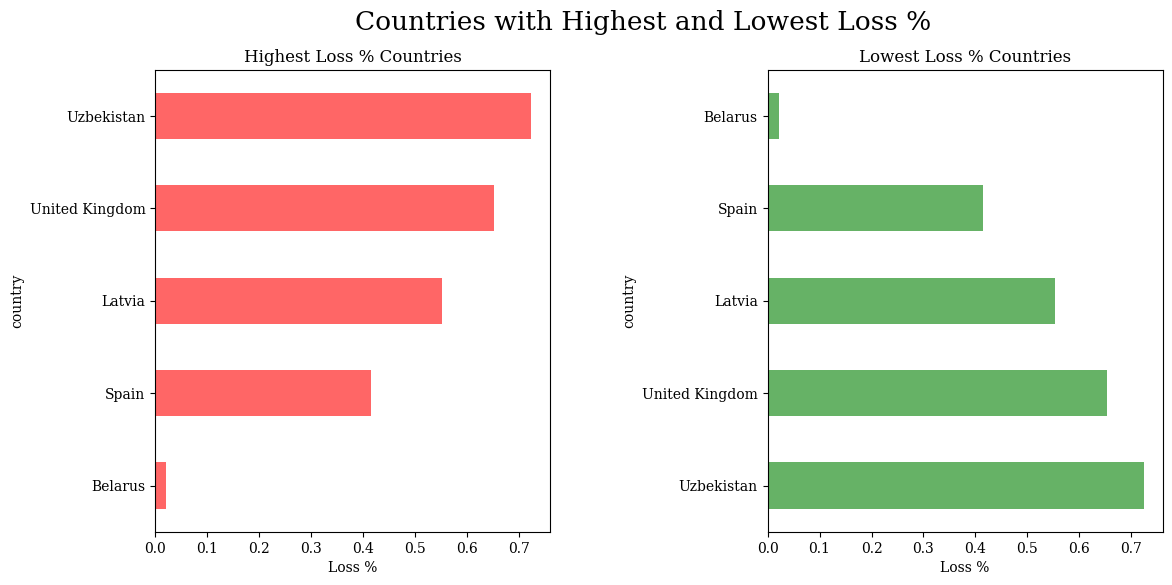

In [65]:
# Plot the countries with the highest loss percentage and lowest loss percentage 
# Code adapted from my previous project

fig, ax = plt.subplots(1, 2, figsize=(13,6))

# Use groupby to get countries and their average average loss percentage
country_loss = df2.groupby('country')['loss_percentage'].mean()

highest = country_loss.sort_values(ascending=True).head()
lowest = country_loss.sort_values(ascending=False).tail()


highest.plot(kind='barh', ax=ax[0], color = 'red', alpha=0.6)
lowest.plot(kind='barh', ax=ax[1], color= 'green', alpha= 0.6)

ax[0].set(xlabel= 'Loss %', title = 'Highest Loss % Countries')
ax[1].set(xlabel='Loss %', title = 'Lowest Loss % Countries')


plt.subplots_adjust(wspace= .55)
fig.suptitle('Countries with Highest and Lowest Loss %', fontsize=19)
plt.savefig('Countries with Highest and Lowest Loss %');

#### Line Plot for Loss % over the Years

In [1]:
# Create a line plot to visualize the trend in loss % over the years 2000-2021

# Get average value per year
average_per_year = df2.groupby('year')['loss_percentage'].mean()

# Plot line plot
plt.plot(average_per_year.index, average_per_year.values, color='green', marker = '.')

plt.xlabel('Years')
plt.ylabel('Loss %')
plt.title('Loss % for 2000-2021', size =17)

NameError: name 'df2' is not defined

#### Maps

In [116]:

# Check for inconsistencies in categorical columns ; test
obj_cols = df2.dtypes[df2.dtypes=='object'].index

# Create a loop to examine the categorical columns
for col in obj_cols:
  print(f'Column: {col}')
  print(df2[col].value_counts(dropna=False))
  print('\n')


Column: country
India                    1178
Ethiopia                  885
Kenya                     879
Uganda                    787
Zambia                    728
                         ... 
Oman                        1
Gabon                       1
Bahrain                     1
Saint Kitts and Nevis       1
Algeria                     1
Name: country, Length: 122, dtype: int64


Column: commodity
Maize (corn)                                                                    4531
Rice                                                                            3889
Millet                                                                          3184
Sorghum                                                                         3078
Wheat                                                                           1929
                                                                                ... 
Meat of goat, fresh or chilled (indigenous)                                        

In [163]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23810 entries, 0 to 23809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           23810 non-null  float64
 1   Longitude          23810 non-null  float64
 2   country            23810 non-null  object 
 3   commodity          23810 non-null  object 
 4   year               23810 non-null  int64  
 5   loss_percentage    23810 non-null  float64
 6   activity           23810 non-null  object 
 7   food_supply_stage  23810 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 2.1+ MB


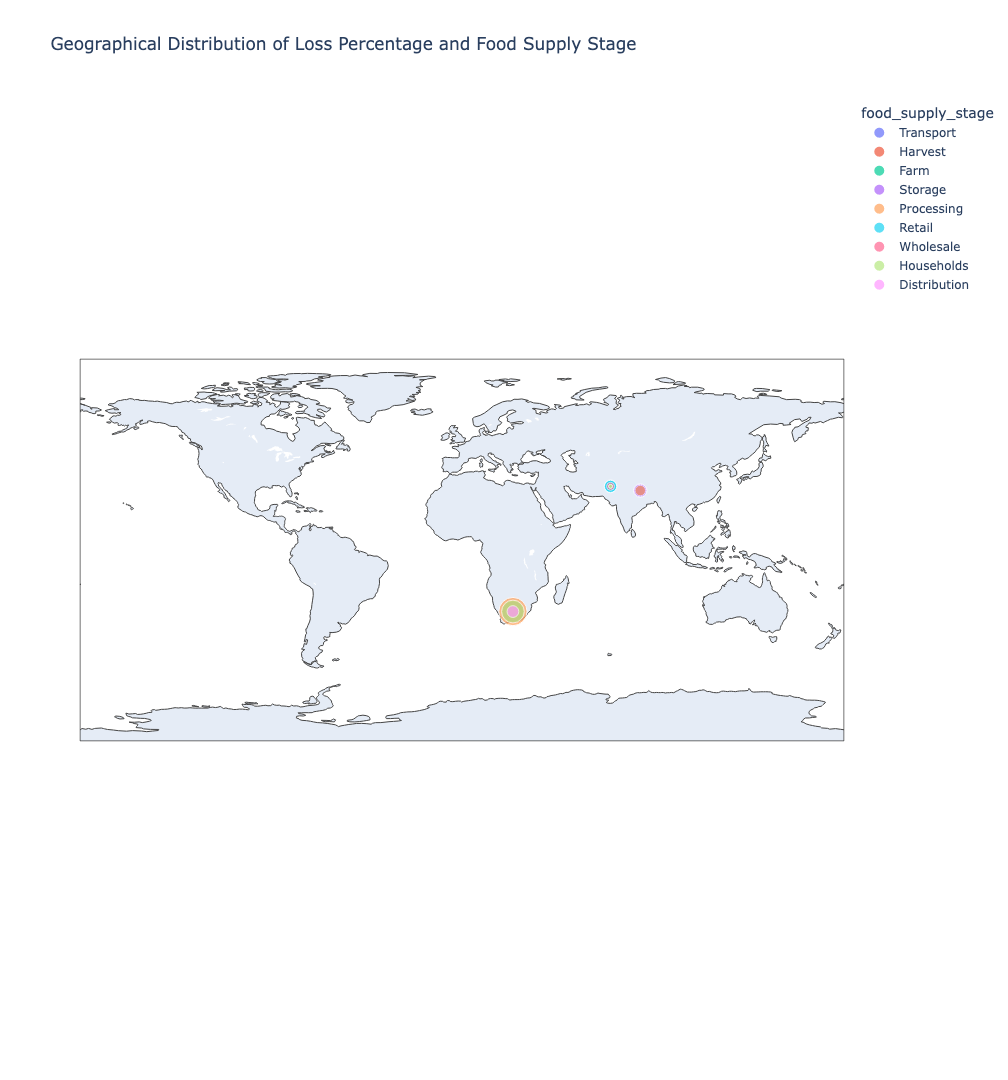

In [175]:
# Create a map plot for the most recent year in this dataset
# Code adapted from https://github.com/softhints/Pandas-Tutorials/blob/master/geocoding/1.plot-latitude-longitude-pandas-dataframe-python.ipynb

# Create a filter that only returns rows from 2021
fil_df = df2[(df2['year'] == 2021)]

# Create map
px.scatter_geo(fil_df, lat='Latitude', lon='Longitude',
               size='loss_percentage', 
               color = 'food_supply_stage', 
               title = 'Geographical Distribution of Loss Percentage and Food Supply Stage 2021')

In [176]:
fil_df

,Latitude,Longitude,country,commodity,year,loss_percentage,activity,food_supply_stage
16915,28.0,84.0,Nepal,Wheat,2021,0.34,Transportation,Transport
16916,28.0,84.0,Nepal,Wheat,2021,1.76,Harvesting,Harvest
16917,28.0,84.0,Nepal,Wheat,2021,3.70,Shelling,Farm
16918,28.0,84.0,Nepal,Wheat,2021,2.07,Drying,Farm
16919,28.0,84.0,Nepal,Wheat,2021,5.92,Storage,Storage
16920,28.0,84.0,Nepal,Maize (corn),2021,1.63,Harvesting,Harvest
16921,28.0,84.0,Nepal,Maize (corn),2021,7.30,Storage,Storage
16922,28.0,84.0,Nepal,Maize (corn),2021,3.33,Harvesting,Harvest
16923,28.0,84.0,Nepal,Maize (corn),2021,2.85,Shelling,Farm
16924,28.0,84.0,Nepal,Maize (corn),2021,1.04,Transportation,Transport


Year 2021
- Countries:  Nepal, Pakistan , South Sfrica,  
- Loss % : 0.32 - 31.60

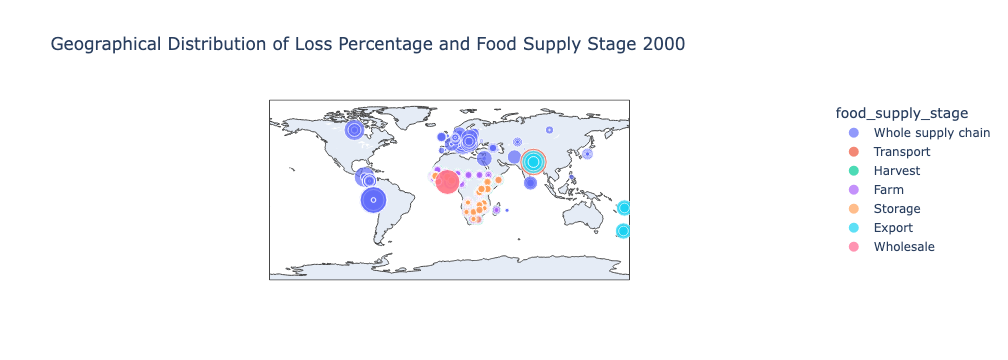

In [185]:
# Create a map plot for the oldest year in this dataset

# Create a filter that only returns rows from the 2000
fil_df = df2[(df2['year'] == 2000)]

# Create map
px.scatter_geo(fil_df, lat='Latitude', lon='Longitude', 
               size='loss_percentage', 
               color = 'food_supply_stage',
               title = 'Geographical Distribution of Loss Percentage and Food Supply Stage 2000')

In [184]:
fil_df['loss_percentage'].describe()

count    1052.000000
mean        3.837291
std         5.157959
min         0.020000
25%         1.320000
50%         2.500000
75%         4.000000
max        38.290000
Name: loss_percentage, dtype: float64

Year 2000:
- 72 different types of countries
- Loss % : 0.02- 38.29

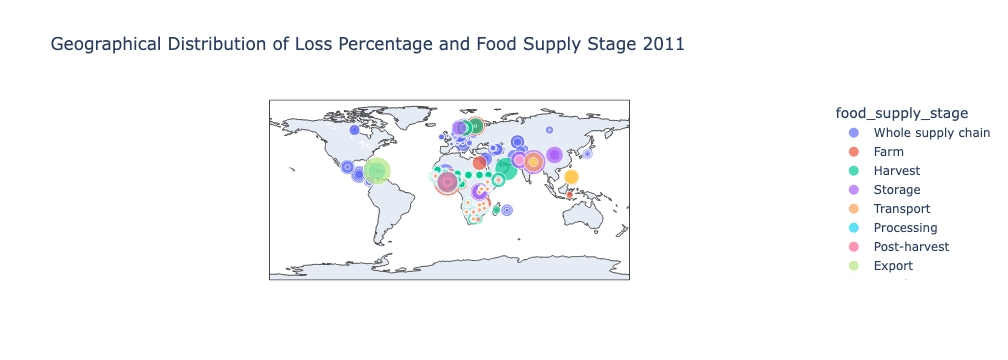

In [186]:
# Create a map plot for the oldest year in this dataset

# Create a filter that only returns rows from the 2011
fil_df = df2[(df2['year'] == 2011)]

# Create map
px.scatter_geo(fil_df, lat='Latitude', lon='Longitude', 
               size='loss_percentage', 
               color = 'food_supply_stage',
               title = 'Geographical Distribution of Loss Percentage and Food Supply Stage 2011')

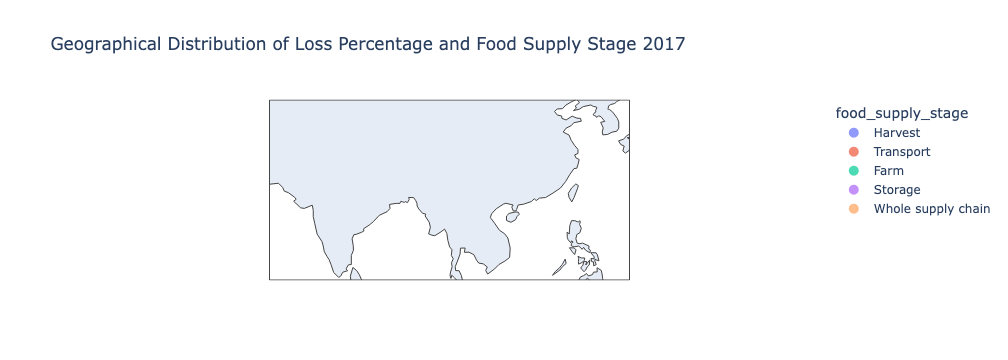

In [190]:
# Create a map plot for the oldest year in this dataset

# Create a filter that only returns rows from the 2011
fil_df = df2[(df2['year'] == 2020)]

# Create map
px.scatter_geo(fil_df, lat='Latitude', lon='Longitude', 
               size='loss_percentage', 
               color = 'food_supply_stage',
               title = 'Geographical Distribution of Loss Percentage and Food Supply Stage 2020')